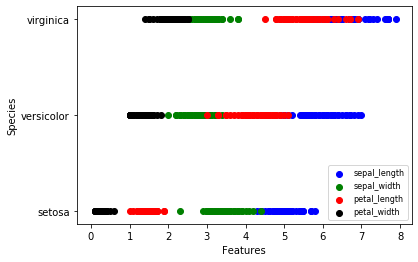

/Users/gajpande/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/gajpande/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

1.0


In [13]:
# 1. Logistic regression

# Import the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Load the data set
data = sns.load_dataset("iris")
data.head()

#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# Plot the relation of each feature with each species

plt.xlabel('Features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:,'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()


#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

#Test the model
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

Number of data points :: 150
Number of features :: 4


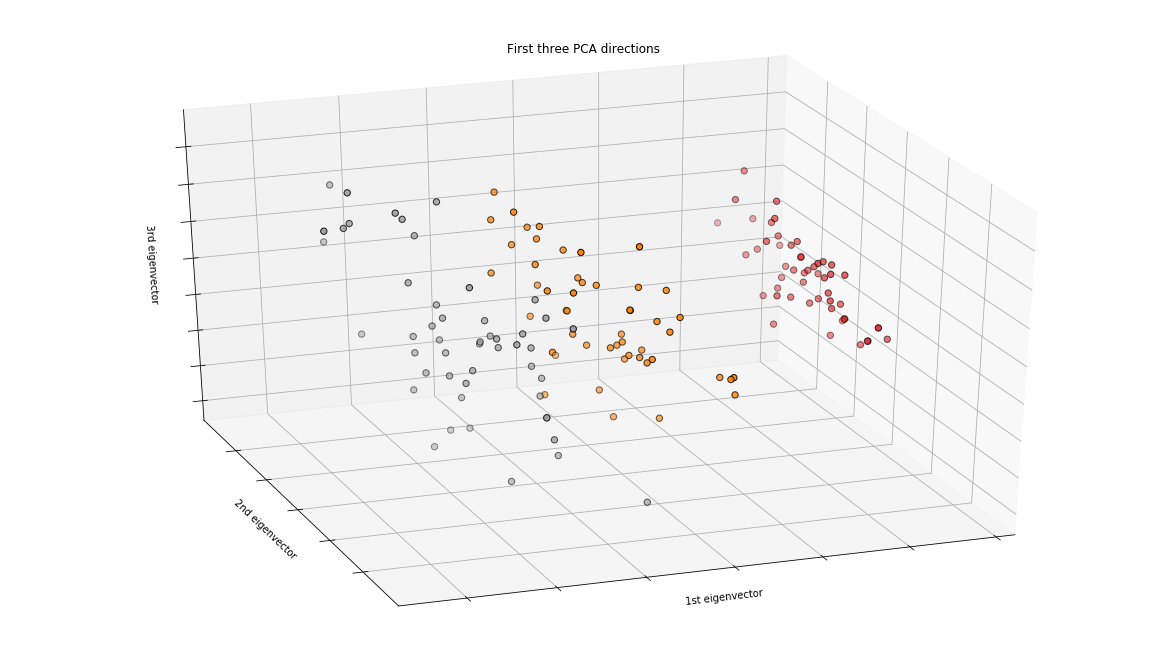

The number of features in the new subspace is  3
Accuracy of linear SVC on training set: 0.96
Accuracy of linear SVC on test set: 1.00
Accuracy of non-linear SVC on training set: 0.99
Accuracy of non-linear SVC on test set: 1.00


/Users/gajpande/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:
# 2. Support vector machine (SVM)

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target
print ("Number of data points ::", X.shape[0])
print("Number of features ::", X.shape[1])

# Transform the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction
# PCA - compreses the data by projecting it to a new subspace that 
# can help in reducing the effect of the curse of dimentionality.
fig = plt.figure(1, figsize=(16, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_scaled)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()
print("The number of features in the new subspace is " ,X_reduced.shape[1])


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                        X_reduced, y, test_size=0.2, random_state=42)


from sklearn.svm import LinearSVC

#Fit linear SVC
clf = LinearSVC(penalty='l2', loss='squared_hinge',
                dual=True, tol=0.0001, C=100, multi_class='ovr',
                fit_intercept=True, intercept_scaling=1, class_weight=None,verbose=0
                , random_state=0, max_iter=1000)
clf.fit(X_train,y_train)

print('Accuracy of linear SVC on training set: {:.2f}'.format(clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(clf.score(X_test, y_test)))


#Non-linear SVC
from sklearn.svm import SVC

clf_SVC = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
clf_SVC.fit(X_train,y_train)

print('Accuracy of non-linear SVC on training set: {:.2f}'.format(clf_SVC.score(X_train, y_train)))

print('Accuracy of non-linear SVC on test set: {:.2f}'.format(clf_SVC.score(X_test, y_test)))


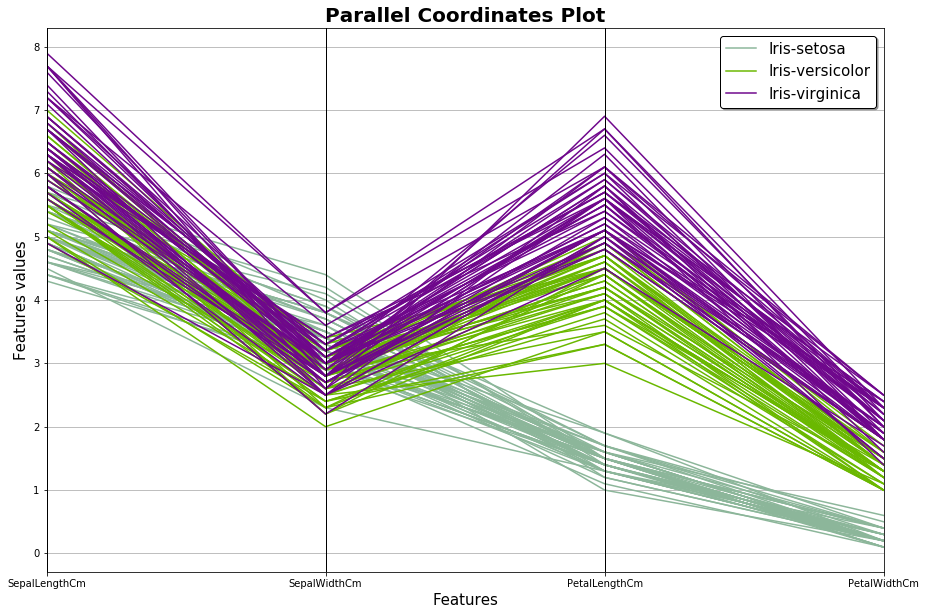

Accuracy of our model is equal 96.67 %.


In [28]:
# 3. K Nearest Neighbor
import numpy as np
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/Users/gajpande/Desktop/iris/Iris.csv')
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# KNeighborsClassifier does not accept string labels.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Parallel Coordinates
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

In [34]:
# 4. Decision tree

# Importing Libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

# Defining and fitting a DecisionTreeClassifier instance
tree = DecisionTreeClassifier(max_depth = 2)
tree.fit(X,y)
tree.score(X, y)

0.96

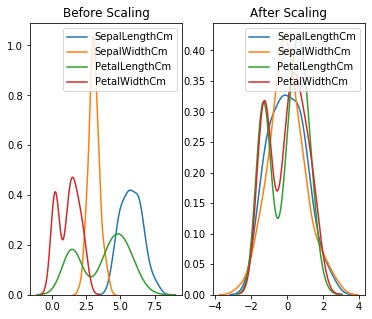

0.9


In [63]:
# 5. Neural Network

# Importing Libraries
import pandas as pd

data = pd.read_csv('/Users/gajpande/Desktop/iris/Iris.csv')
from sklearn.model_selection import train_test_split
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Replace Iris-setosa with 0, Iris-versicolor 1 and Iris-virginica 2 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Species"] = labelencoder.fit_transform(data["Species"])
species = pd.DataFrame({'Species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})

# Onehotencoder works with a matrix of integers whereas getdummies works with a dataframe
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
data = create_dummies(data,"Species")

# Features before mean normalization
unscaled_features = X_train
# Mean Normalization to have a faster classifier 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#calculate μ & σ(fit) and apply the transformation(transform)
X_train_array = sc.fit_transform(X_train.values)
# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
# Center test data with the μ & σ computed (fitted) on training data
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

# Before & After Mean normalization
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(unscaled_features['SepalLengthCm'], ax=ax1)
sns.kdeplot(unscaled_features['SepalWidthCm'], ax=ax1)
sns.kdeplot(unscaled_features['PetalLengthCm'], ax=ax1)
sns.kdeplot(unscaled_features['PetalWidthCm'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train['SepalLengthCm'], ax=ax2)
sns.kdeplot(X_train['SepalWidthCm'], ax=ax2)
sns.kdeplot(X_train['PetalLengthCm'], ax=ax2)
sns.kdeplot(X_train['PetalWidthCm'], ax=ax2)

plt.show()


# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10),solver='sgd',learning_rate_init= 0.01, max_iter=500)

# Train the model
mlp.fit(X_train, y_train)

# Outputs:
MLPClassifier (activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=10, learning_rate='constant',      
learning_rate_init=0.01, max_iter=500, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=None,       
shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=False)


# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test
print(mlp.score(X_test,y_test))

Local copy of the dataset file: /Users/gajpande/.keras/datasets/iris_training.csv
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species
OrderedDict([('sepal_length', <tf.Tensor: id=100336, shape=(32,), dtype=float32, numpy=
array([7.9, 5.4, 4.8, 7.6, 4.6, 6.6, 4.4, 6.6, 6.1, 4.4, 5.6, 5. , 5. ,
       7.4, 5.3, 6.7, 5.1, 6.4, 7.7, 5.5, 6.4, 6.2, 5.9, 5.4, 5.9, 5.4,
       5.1, 5. , 6.5, 6.8, 6.1, 7. ], dtype=float32)>), ('sepal_width', <tf.Tensor: id=100337, shape=(32,), dtype=float32, numpy=
array([3.8, 3. , 3. , 3. , 3.6, 3. , 3.2, 2.9, 2.6, 2.9, 2.5, 3.6, 3.4,
       2.8, 3.7, 3. , 3.8, 3.1, 2.8, 2.4, 2.7, 2.8, 3.2, 3.4, 3. , 3.9,
       3.8, 3.4, 3. , 3.2, 2.8, 3.2], dtype=float32)>), ('petal_length', <tf.Tensor: id=100334, shape=(32,), dtype=float32, numpy=
array([6.4, 4.5, 1.4, 6.6, 1. , 4.4, 1.3, 4.6, 5.6, 1.4, 3.9, 1.4, 1.6,
       6.1, 1.5, 5.2, 1.5, 5.5, 6.7, 3.8, 5.3, 4.8, 4.8, 1.5, 5.1, 1.7,
       1.9, 1.5, 5.2, 5.9, 4.7, 4.7], dtype=float

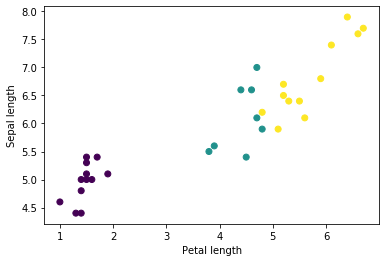

tf.Tensor(
[[6.6 3.  4.4 1.4]
 [6.2 2.8 4.8 1.8]
 [5.4 3.  4.5 1.5]
 [6.9 3.2 5.7 2.3]
 [6.9 3.1 4.9 1.5]], shape=(5, 4), dtype=float32)
Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [1 2 1 2 1 1 2 0 0 0 1 2 2 0 1 1 0 0 2 2 1 1 0 1 1 2 2 2 2 0 0 2]
Loss test: 2.483382225036621
Step: 0, Initial Loss: 2.483382225036621
Step: 1,         Loss: 1.3140596151351929
Epoch 000: Loss: 1.165, Accuracy: 42.500%
Epoch 050: Loss: 0.391, Accuracy: 93.333%
Epoch 100: Loss: 0.240, Accuracy: 97.500%
Epoch 150: Loss: 0.159, Accuracy: 95.833%
Epoch 200: Loss: 0.123, Accuracy: 98.333%


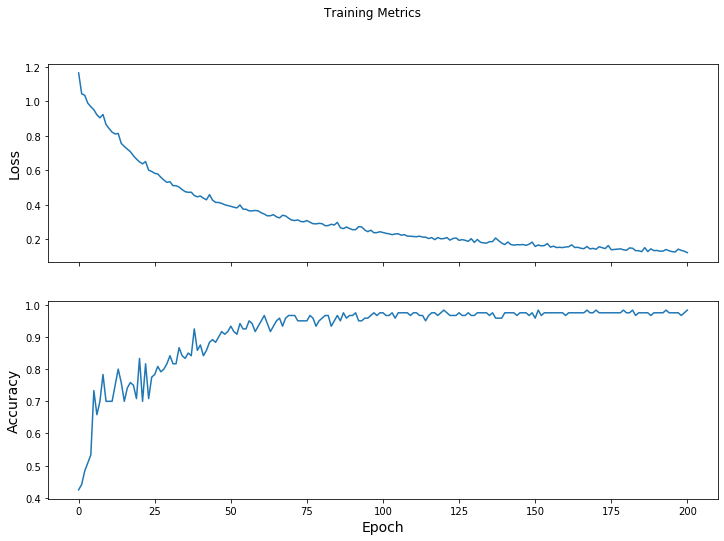

In [81]:
# 6. Neural network using Tensor flow

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

import tensorflow as tf

train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

features, labels = next(iter(train_dataset))

print(features)

plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

train_dataset = train_dataset.map(pack_features_vector)

features, labels = next(iter(train_dataset))

print(features[:5])

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

predictions = model(features)
predictions[:5]

tf.nn.softmax(predictions[:5])

print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))


loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def loss(model, x, y):
  y_ = model(x)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    epoch_accuracy(y, model(x))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))
    
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()
